In [1]:
import pandas as pd
df=pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [2]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [3]:
x=df['cigsPerDay'].mode()[0]
x

0.0

In [4]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])

In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [7]:
df.drop(['education'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
X=df.iloc[:,:-1]
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000


In [10]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(2968, 14)
(1272, 14)


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_train_new

array([[0.        , 0.44736842, 1.        , ..., 0.40746861, 0.52525253,
        0.11299435],
       [1.        , 0.36842105, 1.        , ..., 0.23859881, 0.21212121,
        0.07062147],
       [1.        , 0.36842105, 1.        , ..., 0.23925975, 0.14141414,
        0.0960452 ],
       ...,
       [1.        , 0.15789474, 1.        , ..., 0.50594845, 0.51515152,
        0.1185414 ],
       [0.        , 0.60526316, 0.        , ..., 0.24818242, 0.41414141,
        0.07627119],
       [0.        , 0.10526316, 1.        , ..., 0.23099802, 0.29292929,
        0.09887006]])

In [13]:
X_test_new=sc.transform(X_test)
X_test_new

array([[1.        , 0.10526316, 0.        , ..., 0.50826173, 0.28282828,
        0.08474576],
       [1.        , 0.18421053, 1.        , ..., 0.42267019, 0.51515152,
        0.11016949],
       [0.        , 0.31578947, 1.        , ..., 0.18968936, 0.41414141,
        0.10451977],
       ...,
       [0.        , 0.44736842, 0.        , ..., 0.45670853, 0.35353535,
        0.11299435],
       [0.        , 0.5       , 1.        , ..., 0.39259749, 0.36363636,
        0.12711864],
       [0.        , 0.15789474, 0.        , ..., 0.20257766, 0.41414141,
        0.1920904 ]])

In [14]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1085
           1       0.30      0.13      0.19       187

    accuracy                           0.83      1272
   macro avg       0.58      0.54      0.54      1272
weighted avg       0.78      0.83      0.80      1272



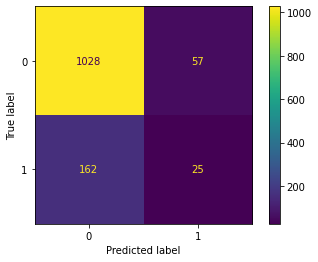

In [15]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))